# Live 13 - Redes Neurais em FinQuant

**Etapas**<br>
<br>
• Passo 0 - Assistir aulas anteriores <br>
• Passo 1 - Carregar bibiotecas<br>
• Passo 2 - Carregar base de dados<br>
• Passo 3 - Tratamento de dados<br>
• Passo 4 - Contrução de alvos e variáveis<br>
• Passo 5 - Preparação da base para treinamento e teste<br>
• Passo 6 - Treinamento do modelo<br>
• Passo 7 - Avaliação de resultados<br>

# Passo 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
%matplotlib inline

In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
import os
os.chdir('C:\\Users\\dalto\\OpM na Prática\\Python\\Base de Dados')

df = pd.read_csv("mini_indice_D1.csv", sep = ";")

In [4]:
df

,Data,Abertura,Maxima,Minima,Fechamento
0,17/05/2005,73165.43,73912.02,72269.53,73673.11
1,18/05/2005,73613.38,75106.56,73613.38,74807.92
2,19/05/2005,73912.02,74807.92,73882.16,74807.92
3,20/05/2005,74658.61,74658.61,73702.98,73912.02
4,23/05/2005,74210.65,74210.65,72717.48,72717.48
...,...,...,...,...,...
3747,13/07/2020,100750.00,101040.00,98300.00,98300.00
3748,14/07/2020,99195.00,100685.00,98360.00,100640.00
3749,15/07/2020,101805.00,102295.00,100810.00,102045.00
3750,16/07/2020,101360.00,101630.00,100230.00,100885.00


In [5]:
per = 1

dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")

dol["Retorno"] = dol["Fechamento"].pct_change(per)

df["Retorno-1"] = df["Retorno"].shift(1)
df["Retorno-2"] = df["Retorno-1"].shift(1)
df["Retorno-3"] = df["Retorno-2"].shift(1) 

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll15"] = dol["DistBoll"].rolling(15).mean()

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std15"] = dol["Fechamento"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])

# Direção do dia atual
dol["dirD"] = np.where(dol["Fechamento"] > dol["Abertura"], '1', '0')
dol["dirD-1"] = dol["dirD"].shift(1)
dol["dirD-2"] = dol["dirD"].shift(2)
dol["dirD-3"] = dol["dirD"].shift(3)

# Média móvel de 15 dias
dol["MM"] = dol["Fechamento"].rolling(15).mean()

# Zscore
dol["zscore"] = (dol["Fechamento"]-dol["MM"])/dol["std15"]

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["MM"])-1

dol["DistBoll-1"] = dol["DistBoll"].shift(1)
dol["DistBoll-2"] = dol["DistBoll"].shift(2)
dol["DistBoll-3"] = dol["DistBoll"].shift(3)

dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])

dol["Pips-1"] = dol["Pips"].shift(1)
dol["Pips-2"] = dol["Pips"].shift(2)
dol["Pips-3"] = dol["Pips"].shift(3)

In [6]:
df["Retorno"].describe()

count    3751.000000
mean        0.000262
std         0.018516
min        -0.130041
25%        -0.009340
50%         0.000563
75%         0.010194
max         0.149722
Name: Retorno, dtype: float64

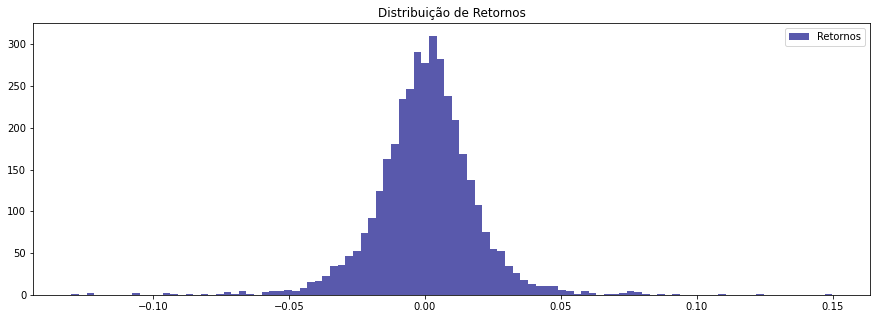

In [7]:
plt.figure(figsize = (15,5))
plt.hist(df["Retorno"], bins = 100
        , alpha = 0.65
        , histtype = "stepfilled"
        , color = "navy"
        , edgecolor = "none"
        , label = "Retornos")

plt.legend()
plt.title("Distribuição de Retornos");

In [8]:
df["Retorno"].describe()[4]

-0.009339547001750492

In [9]:
# Criando alvo, divide em 3 partes 
df["AlvoBin"] = np.where(df["Alvo"] > df["Retorno"].describe()[6]/2 , 1, np.where(df["Alvo"] < df["Retorno"].describe()[4]/2, -1, 0))

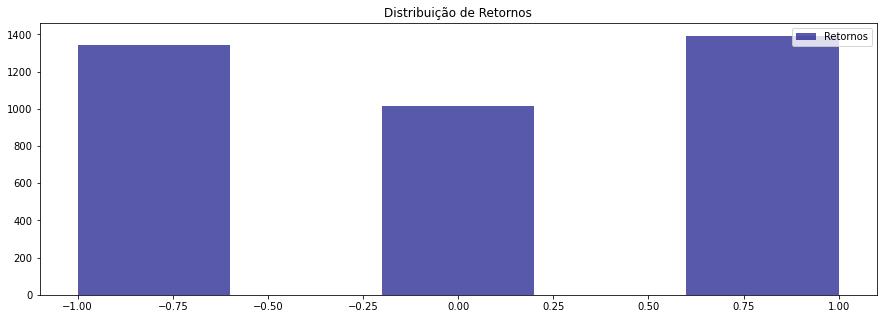

In [10]:
plt.figure(figsize = (15,5))
plt.hist(df["AlvoBin"], bins = 5
        , alpha = 0.65
        , histtype = "stepfilled"
        , color = "navy"
        , edgecolor = "none"
        , label = "Retornos")

plt.legend()
plt.title("Distribuição de Retornos");

In [11]:
# Desvio Padrão de 5 dias
df["std5"] = df["Retorno"].rolling(5).std()

# Desvio Padrão de 10 dias
df["std10"] = df["Retorno"].rolling(10).std()

# Desvio Padrão de 15 dias
df["std15"] = df["Retorno"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
df["prop"] = (df["Fechamento"]-df["Abertura"])/(df["Maxima"]-df["Minima"])

# Direção do dia atual
df["dirD"] = np.where(df["Fechamento"] > df["Abertura"], '1', '0')

# Direção D-1
df["dirD-1"] = df["dirD"].shift(1)

# Direção D-2
df["dirD-2"] = df["dirD"].shift(2)

# Direção D-3
df["dirD-3"] = df["dirD"].shift(3)


# Média móvel de 15 dias dp5
df["MMstd5"] = df["std5"].rolling(15).mean()

# Média móvel de 15 dias dp10
df["MMstd10"] = df["std10"].rolling(15).mean()

# Média móvel de 15 dias dp15
df["MMstd15"] = df["std15"].rolling(15).mean()

# Zscore
#df["zscore"] = (df["Fechamento"]-df["MM"])/df["std15"]


# RSLstd5
df["RSLstd5"] = (df["std5"]/df["std5"].rolling(15).mean())-1
# RSLstd10
df["RSLstd10"] = (df["std10"]/df["std10"].rolling(15).mean())-1
# RSLstd15
df["RSLstd15"] = (df["std15"]/df["std15"].rolling(15).mean())-1

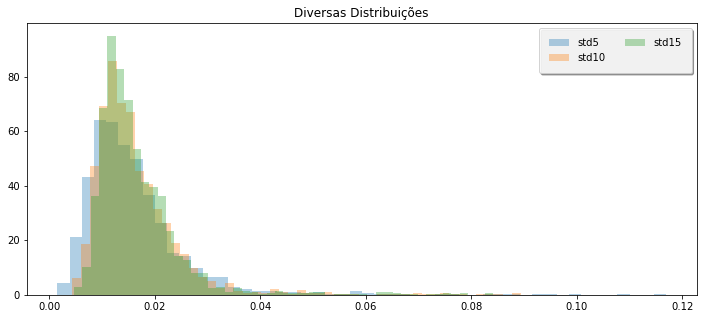

In [12]:
plt.figure(figsize = (12,5))
config = dict(histtype = 'stepfilled', alpha = 0.35, density = True, bins = 50)

plt.hist(df["std5"], **config, label = "std5")
plt.hist(df["std10"], **config, label = "std10")
plt.hist(df["std15"], **config, label = "std15")

# Formatação da legenda - 
plt.legend(loc = "upper right"
          , frameon = True
          , framealpha = 0.85
          , ncol = 2
          , fancybox = True
          , shadow = True
          , borderpad = 1)
plt.title("Diversas Distribuições");

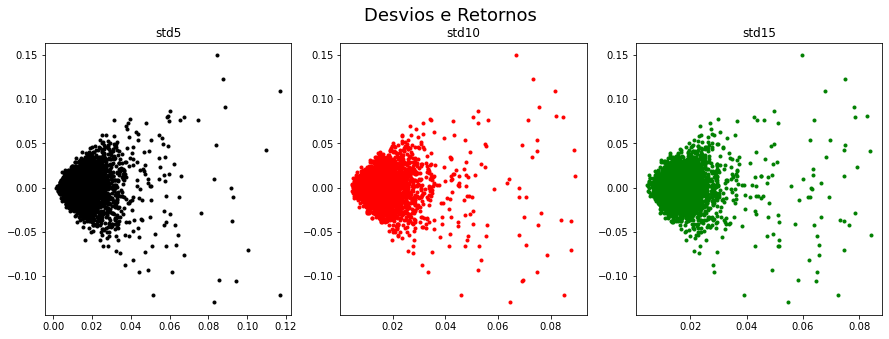

In [13]:
fig, axs = plt.subplots(1,3, figsize=(15,5));
fig.suptitle("Desvios e Retornos", fontsize = 18);

axs[0].set_title('std5')
axs[1].set_title('std10')
axs[2].set_title('std15')
axs[0].plot(df['std5'], df["Retorno"], ".", color = "black", label = "aleatorio")
axs[1].plot(df['std10'], df["Retorno"], ".", color = "r", label = "aleatorio")
axs[2].plot(df['std15'], df["Retorno"], ".", color = "g", label = "aleatorio")

In [14]:
pd.crosstab(pd.qcut(df["RSLstd5"], 10, labels = False), df["AlvoBin"])/df.shape[0]*100

AlvoBin,-1,0,1
RSLstd5,,,
0.0,3.491471,3.011727,3.464819
1.0,3.571429,2.985075,3.384861
2.0,3.917910,2.585288,3.438166
3.0,3.651386,2.531983,3.757996
4.0,3.518124,2.771855,3.678038
5.0,3.464819,2.665245,3.811301
6.0,3.438166,3.065032,3.438166
7.0,3.358209,2.825160,3.757996
8.0,3.198294,2.638593,4.104478


In [15]:
dff = df.dropna(axis = 0)

dff = dff.drop(["std5", "std10", "std15", "MMstd5", "MMstd10", "MMstd15"], axis = 1)

In [16]:
dff["RSLstd5"] = pd.qcut(dff["RSLstd5"], 10, labels = False)
dff["RSLstd10"] = pd.qcut(dff["RSLstd10"], 10, labels = False)
dff["RSLstd15"] = pd.qcut(dff["RSLstd15"], 10, labels = False)

In [17]:
dff.head()

,Data,Abertura,Maxima,Minima,Fechamento,Lag,Retorno,Alvo,Pontos,AlvoBin,prop,dirD,dirD-1,dirD-2,dirD-3,RSLstd5,RSLstd10,RSLstd15
29,28/06/2005,74836.91,74981.11,73971.75,74115.94,73712.20,0.001169,-0.005447,-403.74,-1,-0.714284,0,1,0,0,6,2,0
30,29/06/2005,74404.33,74981.11,73683.36,73712.20,73683.36,-0.005447,-0.000391,-28.84,0,-0.533331,0,0,1,0,6,1,0
31,30/06/2005,73827.55,74404.33,73539.16,73683.36,74260.14,-0.000391,0.007828,576.78,1,-0.166661,0,0,0,1,0,1,0
32,01/07/2005,74115.94,74260.14,73885.23,74260.14,73308.45,0.007828,-0.012816,-951.69,-1,0.384626,1,0,0,0,0,1,0
33,04/07/2005,73250.77,73712.20,73106.58,73308.45,71808.83,-0.012816,-0.020456,-1499.62,-1,0.095241,1,1,0,0,2,1,1


In [18]:
#dff["Data"] = pd.to_datetime(dff["Data"]).dt.normalize()
#dff = dff.set_index("Data")
#dff.head()

In [19]:
# Treinamento de 20017 a 2020.1
sTrain = "2005-07-06"
eTrain = "2011-12-31"
# Teste de 2020.2 até agora 
sTest = "2012-01-01"
eTest = "2020-07-16"

dfTrain = dff[dff["Data"] <= eTrain]
dfTest = dff[dff["Data"] > eTrain]

#dfTrain = dff.loc[sTrain : eTrain]
#dfTest  = dff.loc[sTest  : eTest]

In [20]:
dfTrain.columns

Index(['Data', 'Abertura', 'Maxima', 'Minima', 'Fechamento', 'Lag', 'Retorno',
       'Alvo', 'Pontos', 'AlvoBin', 'prop', 'dirD', 'dirD-1', 'dirD-2',
       'dirD-3', 'RSLstd5', 'RSLstd10', 'RSLstd15'],
      dtype='object')

In [21]:
dfTrain["Data"] = pd.to_datetime(dfTrain["Data"]).dt.normalize()
dfTest["Data"] = pd.to_datetime(dfTest["Data"]).dt.normalize()

dfTrain = dfTrain.set_index("Data")
dfTest = dfTest.set_index("Data")

In [22]:
dfTrain.head(2)

,Abertura,Maxima,Minima,Fechamento,Lag,Retorno,Alvo,Pontos,AlvoBin,prop,dirD,dirD-1,dirD-2,dirD-3,RSLstd5,RSLstd10,RSLstd15
Data,,,,,,,,,,,,,,,,,
2005-01-07,74115.94,74260.14,73885.23,74260.14,73308.45,0.007828,-0.012816,-951.69,-1,0.384626,1,0,0,0,0,1,0
2005-04-07,73250.77,73712.20,73106.58,73308.45,71808.83,-0.012816,-0.020456,-1499.62,-1,0.095241,1,1,0,0,2,1,1


In [23]:
xTrain = dfTrain.iloc[:, 9:16]
yTrain = dfTrain["AlvoBin"].values.reshape(-1,1)

xTest = dfTest.iloc[:, 9:16]
yTest = dfTest["AlvoBin"].values.reshape(-1,1)

In [24]:
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100), max_iter = 100,
                   solver = "sgd", verbose = 10, tol = 1e-8, random_state=42,
                   learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh")

mlp.fit(xTrain, yTrain)

Iteration 1, loss = 1.15246851
Iteration 2, loss = 1.14349280
Iteration 3, loss = 1.13386377
Iteration 4, loss = 1.12697723
Iteration 5, loss = 1.12200688
Iteration 6, loss = 1.11815942
Iteration 7, loss = 1.11578164
Iteration 8, loss = 1.11365512
Iteration 9, loss = 1.11201863
Iteration 10, loss = 1.11083950
Iteration 11, loss = 1.10988087
Iteration 12, loss = 1.10896241
Iteration 13, loss = 1.10825755
Iteration 14, loss = 1.10753773
Iteration 15, loss = 1.10695694
Iteration 16, loss = 1.10638332
Iteration 17, loss = 1.10587033
Iteration 18, loss = 1.10538735
Iteration 19, loss = 1.10492681
Iteration 20, loss = 1.10453451
Iteration 21, loss = 1.10408787
Iteration 22, loss = 1.10361200
Iteration 23, loss = 1.10320721
Iteration 24, loss = 1.10286413
Iteration 25, loss = 1.10249450
Iteration 26, loss = 1.10212812
Iteration 27, loss = 1.10180696
Iteration 28, loss = 1.10147270
Iteration 29, loss = 1.10120357
Iteration 30, loss = 1.10087287
Iteration 31, loss = 1.10054255
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100),
              learning_rate='adaptive', learning_rate_init=5e-05, max_iter=100,
              random_state=42, solver='sgd', tol=1e-08, verbose=10)

In [25]:
predTrain = mlp.predict(xTrain)
predTest = mlp.predict(xTest)

In [26]:
print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[225  35 191]
 [161  21 134]
 [228  27 246]]

------------------------------------------------

              precision    recall  f1-score   support

          -1       0.37      0.50      0.42       451
           0       0.25      0.07      0.11       316
           1       0.43      0.49      0.46       501

    accuracy                           0.39      1268
   macro avg       0.35      0.35      0.33      1268
weighted avg       0.36      0.39      0.36      1268


Acurácia:  38.801


In [27]:
predTot = mlp.predict(dff.iloc[:,9:16])

In [28]:
dff.loc[:,"Previsto"] = predTot
dff.loc[:,"RetornoMod"] = predTot = dff.loc[:,"Previsto"]*dff["Alvo"]

#simulando um stop de 3%

stop = 0.03
dff.loc[:,"RetornoMod"] = np.where(dff.loc[:,"RetornoMod"] < -stop, stop, dff.loc[:, "RetornoMod"])

dff.loc[:,"RetornoModAcum"] = dff["RetornoMod"].cumsum()

In [29]:
dff.loc[:, "RetornoModAcum"].tail()
#dff["RetornoModAcum"].tail()

3746    16.933237
3747    16.957042
3748    16.943081
3749    16.943081
3750    16.967019
Name: RetornoModAcum, dtype: float64

In [30]:
dff["Data"] = pd.to_datetime(dff["Data"]).dt.normalize()
dff = dff.set_index("Data")
dff.head(1)

,Abertura,Maxima,Minima,Fechamento,Lag,Retorno,Alvo,Pontos,AlvoBin,prop,dirD,dirD-1,dirD-2,dirD-3,RSLstd5,RSLstd10,RSLstd15,Previsto,RetornoMod,RetornoModAcum
Data,,,,,,,,,,,,,,,,,,,,
2005-06-28,74836.91,74981.11,73971.75,74115.94,73712.2,0.001169,-0.005447,-403.74,-1,-0.714284,0,1,0,0,6,2,0,0,-0.0,-0.0


In [31]:
dff.index.name = "Date"
dff.reset_index(inplace = True)

dff["Date"] = pd.to_datetime(dff["Date"])
dff["TrainTest"] = np.where(dff["Date"] > eTrain,1,-1)

In [32]:
dff.head(1)

,Date,Abertura,Maxima,Minima,Fechamento,Lag,Retorno,Alvo,Pontos,AlvoBin,...,dirD-1,dirD-2,dirD-3,RSLstd5,RSLstd10,RSLstd15,Previsto,RetornoMod,RetornoModAcum,TrainTest
0,2005-06-28,74836.91,74981.11,73971.75,74115.94,73712.2,0.001169,-0.005447,-403.74,-1,...,1,0,0,6,2,0,0,-0.0,-0.0,-1


In [33]:
bAgreg = dff.resample("M", on = "Date").sum()
bAgreg.loc[:, "RetornoModAcum"] = bAgreg["RetornoMod"].cumsum()*100

""


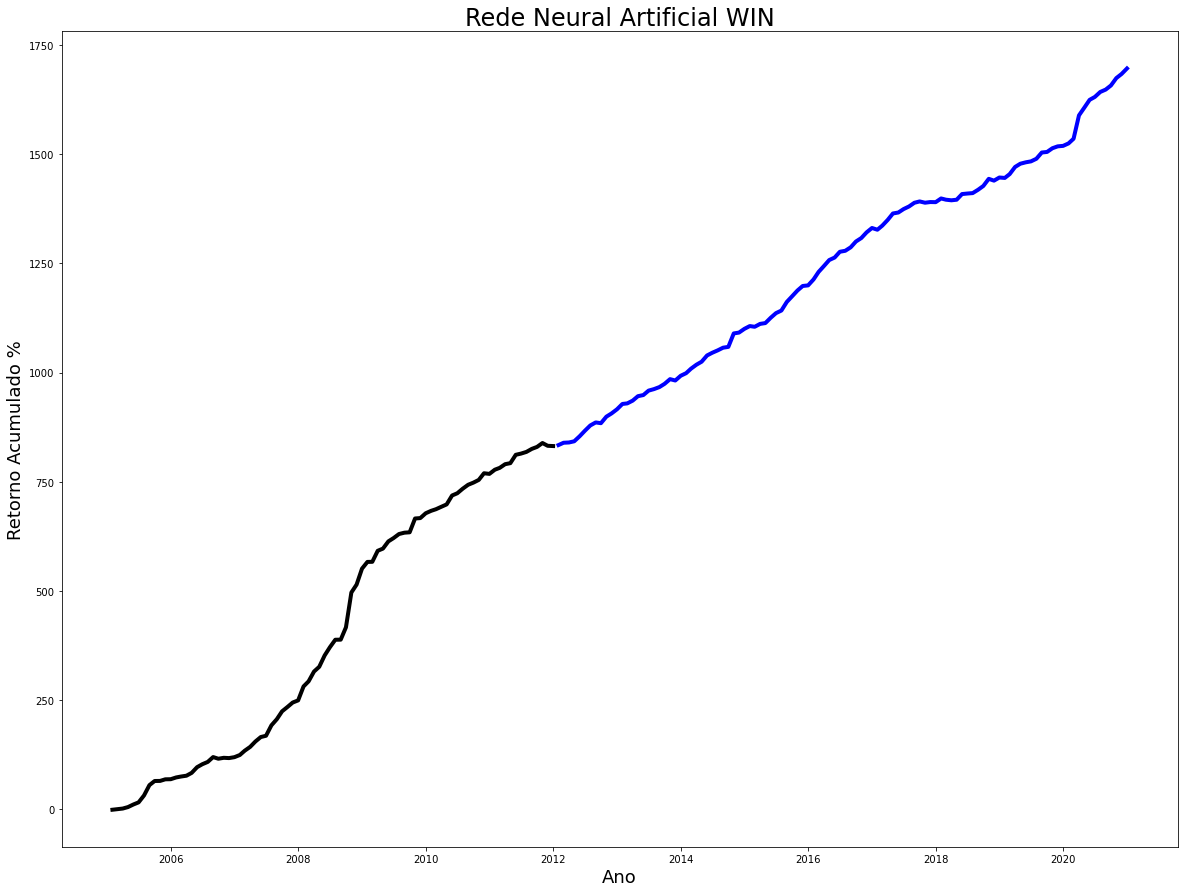

In [34]:
fig,ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["TrainTest"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.RetornoModAcum, c = color, linewidth = lw)
    plt.xlabel("Ano", fontsize = 18)
    plt.ylabel("Retorno Acumulado %", fontsize = 18)
    plt.title("Rede Neural Artificial WIN", fontsize = 24)
    #plt.axvline(x = eTrain, color = "purple", linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    #plt.text('2007-01-01', 500, "Treinamento 2005-2010", **setup)
    #plt.text("2012-01-01", 500, "Teste: 2011-2020", **setup)
    #plt.text("2008-06-01", 500, "ret total 587%", **setup)
    #plt.text("2008-06-01", 500, "Ret Teste 218%", **setup)
    #plt.text("2011-03-01", 500, "@daltonlbs", **setup)
    
bAgreg.groupby((bAgreg["TrainTest"].shift() * bAgreg["TrainTest"] < 0).cumsum()).apply(grafico)